In [168]:
import pandas as pd
import matplotlib
import csv

industries_df = pd.read_csv("C:\\Users\\Jitendra Savanur\\Documents\\Big Data Analytics\\Project\\data\\download.bls.gov\\pub\\time.series\\ce\\ce.industry", sep='\t',lineterminator='\n')
ce_series = pd.read_csv("C:\\Users\\Jitendra Savanur\\Documents\\Big Data Analytics\\Project\\data\\download.bls.gov\\pub\\time.series\\ce\\ce.series", sep='\t',lineterminator='\n')
all_earnings = pd.read_csv("C:\\Users\\Jitendra Savanur\\Documents\\Big Data Analytics\\Project\\data\\download.bls.gov\\pub\\time.series\\ce\\ce.data.02b.AllRealEarningsAE", sep='\t',lineterminator='\n')
ce_period = pd.read_csv("C:\\Users\\Jitendra Savanur\\Documents\\Big Data Analytics\\Project\\data\\download.bls.gov\\pub\\time.series\\ce\\ce.period", sep='\t',lineterminator='\n')
ce_all = pd.read_csv("C:\\Users\\Jitendra Savanur\\Documents\\Big Data Analytics\\Project\\data\\download.bls.gov\\pub\\time.series\\ce\\ce.data.0.AllCESSeries", sep='\t',lineterminator='\n')

In [164]:
industry_dict = {}
industry_to_dtype = {}
for index, row in ce_series.iterrows():
    industry_dict[row["series_id"]] = row["industry_code"]
    industry_to_dtype[row["series_id"]] = row["data_type_code"]
#for index, row in all_earnings.iterrows():
industry_code_to_desc = {}
for index, row in industries_df.iterrows():
    industry_code_to_desc[index] = row["publishing_status"]
    
series_id_to_industry = {}
for series_id, industry_code in industry_dict.items():
    series_id_to_industry[series_id] = industry_code_to_desc[industry_code]
series_id_to_industry

{'CES6562133081    ': 'Offices of mental health practitioners',
 'CES3133600111    ': 'Motor vehicles and parts',
 'CEU6054151206    ': 'Computer systems design services',
 'CEU7072251507    ': 'Snack and nonalcoholic beverage bars',
 'CES6562320011    ': 'Residential mental health facilities',
 'CEU1021311206    ': 'Support activities for oil and gas operations',
 'CES7071320002    ': 'Gambling industries',
 'CEU3231300081    ': 'Textile mills',
 'CES4348810012    ': 'Support activities for air transportation',
 'CES3133270015    ': 'Machine shops and threaded products',
 'CES7071211002    ': 'Museums',
 'CES2023813016    ': 'Framing contractors',
 'CES6056000010    ': 'Administrative and waste services',
 'CEU3232616010    ': 'Plastics bottles and laminated plastics plate, sheet, and shapes',
 'CEU4142374017    ': 'HVAC and refrigeration equipment',
 'CES4348540030    ': 'School and employee bus transportation',
 'CEU4142332082    ': 'Masonry materials',
 'CEU3132191811    ': 'Cut st

In [165]:
industries = []
for index, row in ce_all.iterrows():
    industries.append(series_id_to_industry[row["series_id"]])
industries

dtypes = []
for index, row in ce_all.iterrows():
    dtypes.append(industry_to_dtype[row["series_id"]])


In [169]:
industries_series = pd.Series(industries)
ce_all["industry"] = industries_series.values
dtypes_series = pd.Series(dtypes)
ce_all["data_type"] = dtypes_series.values
dtypes[1000]

10

In [105]:
len(ce_all)

7248359

In [178]:
import numpy as np
all_earnings_some_industries = ce_all[(ce_all["industry"] == "Service-providing") | (ce_all["industry"] == "Private service-providing") | (ce_all["industry"] == "Goods-producing")]
women = ce_all[ce_all["data_type"] == 10]
all_with_women = ce_all[ce_all["data_type"] == 1]

#all_earnings_some_industries = all_earnings_some_industries.groupby(["year","industry"]).agg({"value":np.mean})
len(all_earnings_some_industries)
all_earnings_some_industries = all_earnings_some_industries[["series_id","year","industry","value"]]
all_earnings_some_industries.columns
to_plot = all_earnings_some_industries.groupby(['year','industry'])['value'].mean()
#to_plot = to_plot.groupby(['year','industry'], as_index=False).agg(lambda x: set(x))
#to_plot.columns = ["year","industry","value"]
#to_plot = to_plot.unstack('industry').loc[:, 'value']
to_plot = pd.DataFrame(to_plot)
#to_plot.columns = ["year","industry","value"]
to_plot.to_csv("aggdate.csv")
to_plot = pd.read_csv("aggdate.csv")
to_plot

all_and_women = [women,all_with_women]
all_and_women_df = pd.concat(all_and_women)
to_plot_women_and_all = all_and_women_df.groupby(["year","data_type"])['value'].mean()
to_plot_women_and_all_df = pd.DataFrame(to_plot_women_and_all)
to_plot_women_and_all_df.to_csv('women_and_all.csv')
#all_earnings_some_grouped

In [51]:
import numpy as np
#data_to_plot = all_earnings.groupby(['year','industry']).agg({"value":np.mean})
data_to_plot = all_earnings.pivot_table(index='year',columns='industry',aggfunc=np.mean)

In [43]:
data_to_plot.columns


Index(['value'], dtype='object')

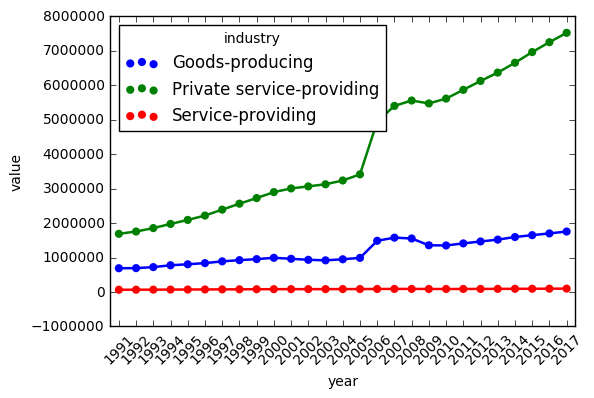

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

to_plot_little = to_plot[to_plot["year"] > 1990]
sns.pointplot(x="year",y="value",hue="industry",data=to_plot_little)
plt.xticks(rotation=45)
plt.show()

In [157]:
to_plot_little

,year,industry,value
156,1991,Goods-producing,6.913046e+05
157,1991,Private service-providing,1.690937e+06
158,1991,Service-providing,6.715719e+04
159,1992,Goods-producing,6.944742e+05
160,1992,Private service-providing,1.757084e+06
161,1992,Service-providing,6.789209e+04
162,1993,Goods-producing,7.244622e+05
163,1993,Private service-providing,1.857218e+06
164,1993,Service-providing,6.947367e+04
165,1994,Goods-producing,7.777531e+05


In [186]:
to_plot_women_and_all_df = pd.read_csv('women_and_all.csv')
to_plot_women_and_all_df = to_plot_women_and_all_df[to_plot_women_and_all_df["year"] > 1980]
categ = []
for index, row in to_plot_women_and_all_df.iterrows():
    if row["data_type"] == 1:
        categ.append("All")
    else:
        categ.append("Women")
categ_series = pd.Series(categ)
to_plot_women_and_all_df['category'] = categ_series.values
len(to_plot_women_and_all_df)

74

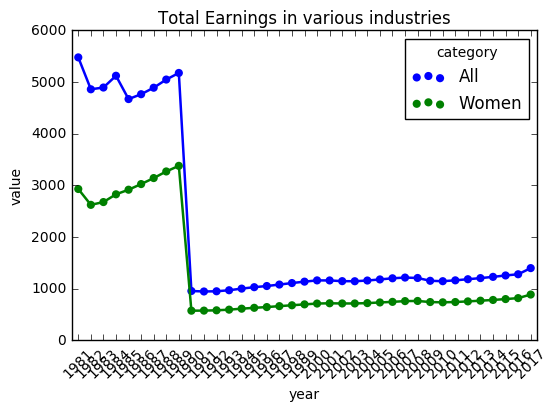

In [189]:
#to_plot_women_and_all_df = pd.read_csv('women_and_all.csv')
#to_plot_women_and_all_df = to_plot_women_and_all_df[to_plot_women_and_all_df["year"] > 1970]

import seaborn as sns
import matplotlib.pyplot as plt

#to_plot_little = to_plot[to_plot["year"] > 1990]
women_all_plot = sns.pointplot(x="year",y="value",hue="category",data=to_plot_women_and_all_df)
women_all_plot.set_title("Total Earnings in various industries")

plt.xticks(rotation=45)
plt.show()